# Guia Didático: Testes da API Nano Banana Service
Este notebook orienta, passo a passo, como exercitar cada endpoint da API em `http://localhost:8000`.
- Certifique-se de que o servidor está rodando localmente.
- Sempre que precisarmos de uma imagem de usuário, usaremos `images/valentim.JPG`.
- Para exemplos de produto (quando necessário), usaremos `images/relogio.png`.

In [3]:
# Imports e utilitários
import requests, json, base64
from io import BytesIO
from PIL import Image
from IPython.display import display, Markdown
from pathlib import Path

def display_base64_image(image_base64: str):
    img_bytes = base64.b64decode(image_base64)
    img = Image.open(BytesIO(img_bytes))
    display(img)
    return img

def save_base64_image(image_base64: str, filename: str):
    img_bytes = base64.b64decode(image_base64)
    with open(filename, "wb") as f:
        f.write(img_bytes)
    return Path(filename).resolve()

def read_image_bytes(path: str) -> bytes:
    with open(path, "rb") as f:
        return f.read()

In [ ]:
# Configurações padrão para os testes
API_BASE = "http://34.61.215.100:8080" # Aplicação rodando
# API_BASE = "http://localhost:8080"

USER_IMAGE = "images/valentim.JPG"
PRODUCT_IMAGE = "images/relogio.png"
MODEL_NAME = "gemini-2.5-flash-image-preview"

print("Base:", API_BASE)
print("Imagem de usuário:", USER_IMAGE)
print("Imagem de produto:", PRODUCT_IMAGE)

Base: http://34.61.215.100:8080
Imagem de usuário: images/valentim.JPG
Imagem de produto: images/relogio.png


In [5]:
# 1) Health check
url = f"{API_BASE}/health"
resp = requests.get(url)
print(resp.status_code, resp.text)
assert resp.status_code == 200

200 {"status":"healthy"}


In [6]:
# 2) Listar produtos
url = f"{API_BASE}/products"
resp = requests.get(url)
print("Status:", resp.status_code)
data = resp.json() if resp.ok else {}
products = data.get("products", [])
print(f"Produtos encontrados: {len(products)}")
if products:
    print("Primeiro produto:", json.dumps(products[0], ensure_ascii=False, indent=2))

Status: 200
Produtos encontrados: 9
Primeiro produto: {
  "id": "OLJCESPC7Z",
  "name": "Sunglasses",
  "description": "Add a modern touch to your outfits with these sleek aviator sunglasses.",
  "price": "19",
  "picture": "/static/img/products/sunglasses.jpg",
  "categories": [
    "accessories"
  ]
}


In [7]:
# 3) Buscar produto por nome (ex.: 'Sunglasses')
product_name = "Sunglasses"
url = f"{API_BASE}/products-name/{product_name}"
resp = requests.get(url)
print("Status:", resp.status_code)
data = resp.json() if resp.ok else {}
by_name = data.get("products", [])
print(f"Produtos encontrados com nome '{product_name}': {len(by_name)}")
if by_name:
    print(json.dumps(by_name[0], ensure_ascii=False, indent=2))

Status: 200
Produtos encontrados com nome 'Sunglasses': 1
{
  "id": "OLJCESPC7Z",
  "name": "Sunglasses",
  "description": "Add a modern touch to your outfits with these sleek aviator sunglasses.",
  "price": "19",
  "picture": "/static/img/products/sunglasses.jpg",
  "categories": [
    "accessories"
  ]
}


Status: 200


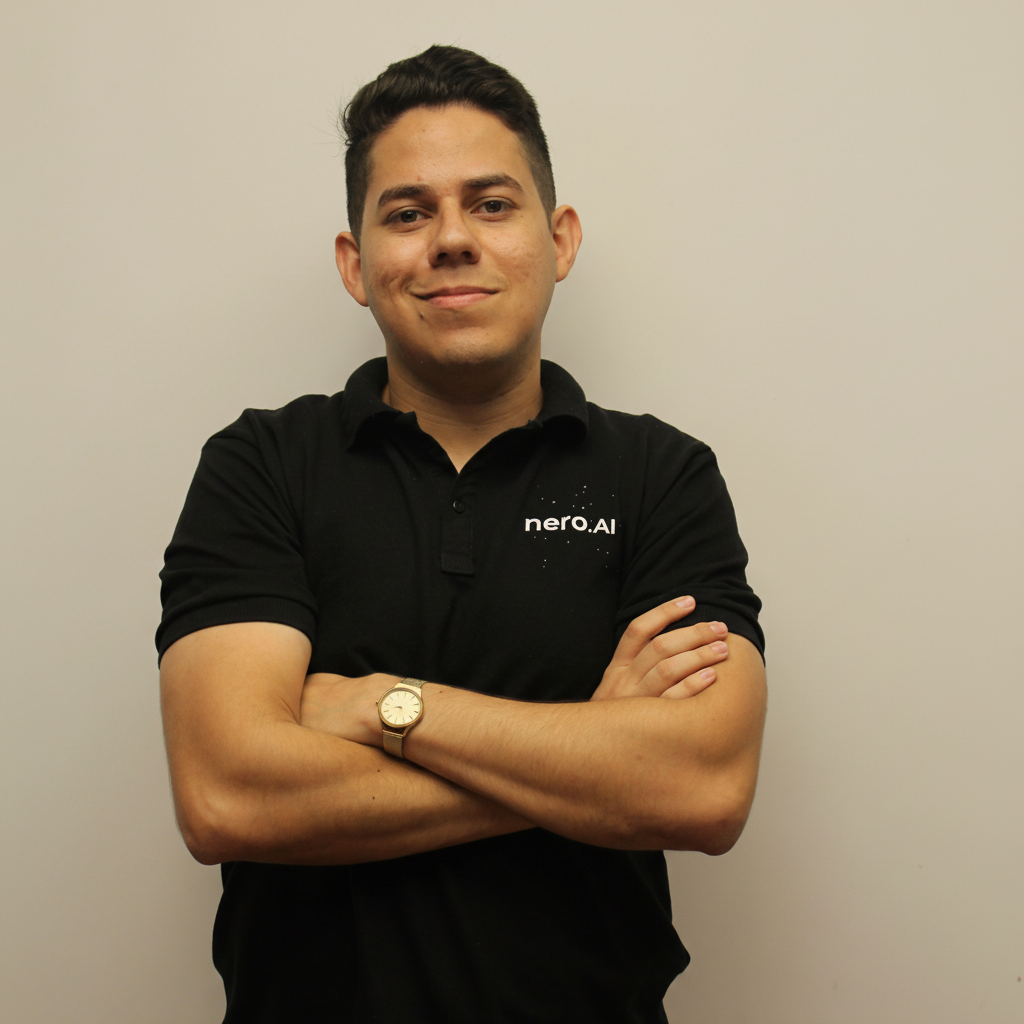

In [8]:
# 4) Remix de imagens (usuário + produto)
url = f"{API_BASE}/remix-images"
prompt = "Faz um mix das imagens. Coloque o relógio no pulso do rapaz de forma natural."
files = {
    'image1': ('valentim.JPG', read_image_bytes(USER_IMAGE), 'image/jpeg'),
    'image2': ('relogio.png', read_image_bytes(PRODUCT_IMAGE), 'image/png'),
}
data = {'prompt': prompt, 'stream': False}
resp = requests.post(url, files=files, data=data)
print("Status:", resp.status_code)
if resp.ok:
    # Exibe diretamente a imagem binária retornada deste endpoint
    from IPython.display import Image as IPyImage
    display(IPyImage(resp.content))
else:
    print(resp.text)

In [9]:
# 5) Descrever imagem (product/person)
url = f"{API_BASE}/describe-image"
files = {'image': ('valentim.JPG', read_image_bytes(USER_IMAGE), 'image/jpeg')}
params = {'type_prompt': 'person'}
resp = requests.post(url, files=files, data=params)
print("Status:", resp.status_code)
if resp.ok:
    print(resp.json())
else:
    print(resp.text)

Status: 200
{'image_id': '1758475451_78d43840', 'description': 'A imagem mostra um jovem em pé, de frente para a câmera, com os braços cruzados sobre o peito. Ele está vestindo uma camisa polo preta com a gola levantada e um logotipo branco no lado esquerdo do peito. O logotipo consiste na palavra "nero.AI" em letras minúsculas, com um ponto entre "nero" e "AI". A parte inferior da camisa está um pouco enrugada e um pequeno pedaço de uma calça jeans azul é visível abaixo da cintura. O fundo atrás dele é uma parede lisa de cor clara, possivelmente cinza ou bege claro. O jovem tem cabelo escuro, curto e penteado para o lado direito. Ele tem um leve sorriso no rosto e parece ter uma barba por fazer, com pelos escuros visíveis ao redor do queixo e bochechas.'}


In [10]:
# 6) Assistant Fashion (elogios e dicas de moda)
url = f"{API_BASE}/assistant-fashion"
files = {'image': ('valentim.JPG', read_image_bytes(USER_IMAGE), 'image/jpeg')}
resp = requests.post(url, files=files)
print("Status:", resp.status_code)
if resp.ok:
    data = resp.json()
    print("Image ID:", data.get("image_id"))
    print("Descrição:\n", data.get("description"))
else:
    print(resp.text)

Status: 200
Image ID: 1758475469_0f788168
Descrição:
 Olá! Uau, que ótima foto! Deixa eu te mostrar como essa camisa polo preta é a escolha perfeita para você e como ela pode se tornar uma peça-chave no seu guarda-roupa.

Analisando seu estilo e a forma como a peça veste em você, fica claro que essa é uma combinação de sucesso. Vamos aos detalhes:

### **Por que essa Polo Preta foi feita para você:**

1.  **Contraste e Sofisticação:** A cor preta é um clássico atemporal que transmite elegância e confiança. Em você, ela cria um contraste marcante e sofisticado que valoriza seu tom de pele e destaca seus traços. É uma cor que comunica poder e modernidade na medida certa.

2.  **Caimento Perfeito:** Observe como a polo abraça seus ombros e braços de forma natural, sem apertar. Esse caimento é ideal, pois valoriza sua estrutura física e projeta uma imagem forte e segura, exatamente como sua postura com os braços cruzados na foto.

3.  **Versatilidade Inteligente:** O seu estilo parece tran

Status: 200


**Image ID:** 1758475604_27783487

**Texto de venda gerado:**

Uau! Você está absolutamente arrasador com esses óculos de sol aviador! Eles adicionaram um toque de mistério e sofisticação ao seu visual, e o caimento está impecável. A armação preta e as lentes escuras complementam perfeitamente seu tom de pele e realçam seus traços, transmitindo uma confiança inabalável.

Esses óculos não são apenas um acessório, são uma declaração de estilo! Eles são versáteis o suficiente para te acompanhar em um passeio descontraído no verão, um evento ao ar livre ou até mesmo para dar um up em um look mais formal. Com eles, você estará pronto para qualquer ocasião, sempre com um ar moderno e elegante.

E o melhor de tudo? Esses óculos não são apenas bonitos, eles são de alta qualidade e com um design que está super em alta! Por apenas 19,00, você leva um produto que vai transformar seus outfits e te fazer sentir ainda mais estiloso. Não perca a chance de adicionar essa peça chave ao seu guarda-roupa e arrancar suspiros por onde passar!

Aproveite essa oportunid

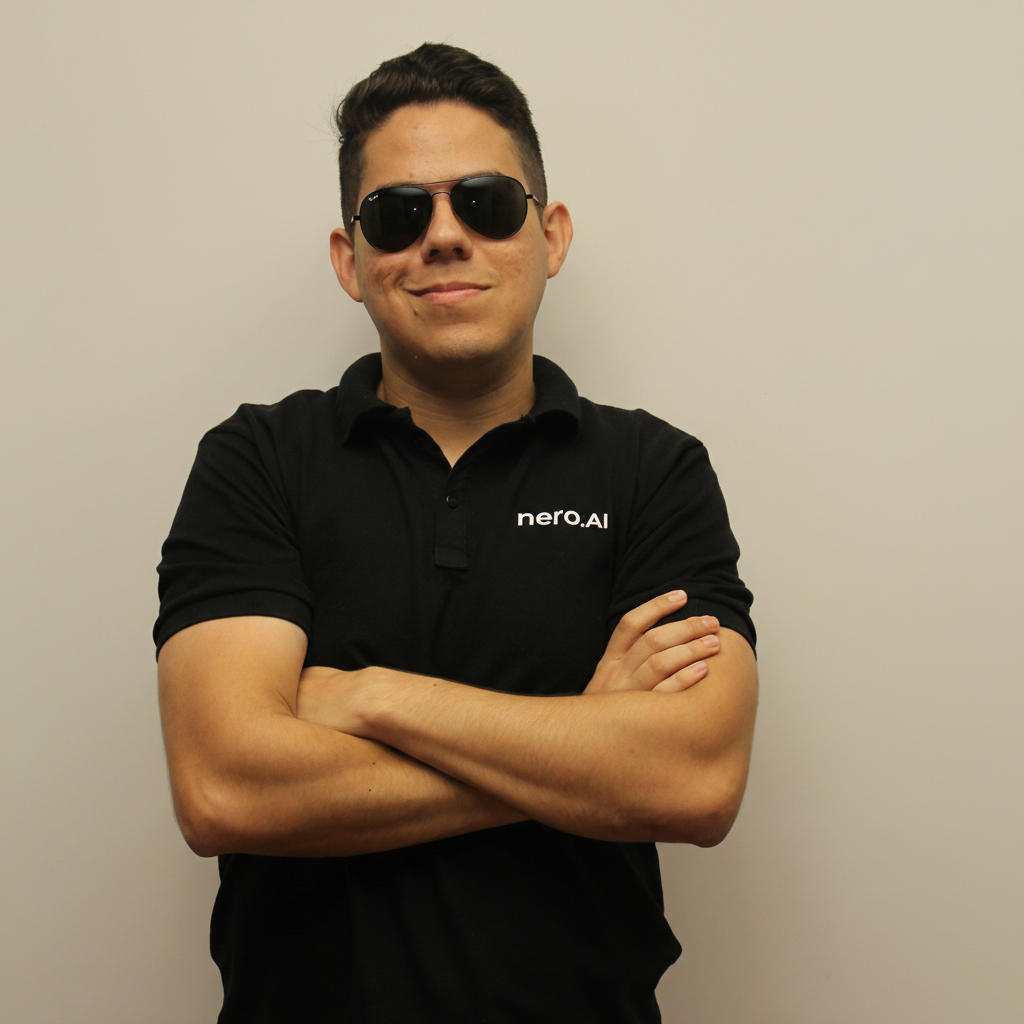

In [12]:
# 7) Sell product from query (imagem + texto do usuário)
url = f"{API_BASE}/sell-product-from-query"
files = {'image': ('valentim.JPG', read_image_bytes(USER_IMAGE), 'image/jpeg')}
data = {
    'text': "Gostaria de um óculos de sol para usar no verão.",
    'model_name': MODEL_NAME,
    'stream': False,
}
resp = requests.post(url, files=files, data=data)
print("Status:", resp.status_code)
if resp.ok:
    result = resp.json()
    display(Markdown(f"**Image ID:** {result.get('image_id')}"))
    display(Markdown("**Texto de venda gerado:**"))
    print(result.get('sell_text'))
    display_base64_image(result.get('image_base64'))
else:
    print(resp.text)

## Dicas
- Se a API retornar erro 500, verifique se o serviço está rodando e se a variável de ambiente `GEMINI_API_KEY` está configurada.
- Para mudar o produto consultado no passo 7, altere o texto em `data['text']`.
- Para salvar a imagem gerada no passo 7, você pode usar:
  ```python
  save_base64_image(result['image_base64'], f"sell_{result['image_id']}.png")
  ```

In [17]:
# API_BASE = "http://localhost:8000"

# 🛒 Teste dos Endpoints de CartService via FastAPI
print("🛒 Testando novos endpoints do CartService...")

# Configuração do teste
import time
user_id = f"test_user_{int(time.time())}"
product_id = "OLJCESPC7Z"  # ID válido do catálogo

try:
    # 1. Adicionar item ao carrinho
    print("1️⃣ Adicionando item ao carrinho...")
    add_url = f"{API_BASE}/cart/add-item"
    add_data = {
        'user_id': user_id,
        'product_id': product_id,
        'quantity': 2
    }
    
    add_resp = requests.post(add_url, data=add_data)
    print(f"Status: {add_resp.status_code}")
    
    if add_resp.ok:
        result = add_resp.json()
        print(f"✅ {result['message']}")
    else:
        print(f"❌ Erro: {add_resp.text}")
        
    # 2. Obter carrinho
    print("\n2️⃣ Obtendo carrinho...")
    get_url = f"{API_BASE}/cart/{user_id}"
    get_resp = requests.get(get_url)
    print(f"Status: {get_resp.status_code}")
    
    if get_resp.ok:
        cart_data = get_resp.json()
        print(f"✅ Carrinho obtido para usuário: {cart_data['user_id']}")
        print(f"📦 Total de itens: {len(cart_data['items'])}")
        for item in cart_data['items']:
            print(f"   - Produto: {item['product_id']}, Quantidade: {item['quantity']}")
    else:
        print(f"❌ Erro: {get_resp.text}")
        
    # 3. Limpar carrinho
    print("\n3️⃣ Limpando carrinho...")
    delete_url = f"{API_BASE}/cart/{user_id}"
    delete_resp = requests.delete(delete_url)
    print(f"Status: {delete_resp.status_code}")
    
    if delete_resp.ok:
        result = delete_resp.json()
        print(f"✅ {result['message']}")
    else:
        print(f"❌ Erro: {delete_resp.text}")
        
except Exception as e:
    print(f"❌ Erro geral: {str(e)}")

print("\n" + "="*50)

🛒 Testando novos endpoints do CartService...
1️⃣ Adicionando item ao carrinho...
Status: 200
✅ Item OLJCESPC7Z adicionado ao carrinho do usuário test_user_1758475630

2️⃣ Obtendo carrinho...
Status: 200
✅ Item OLJCESPC7Z adicionado ao carrinho do usuário test_user_1758475630

2️⃣ Obtendo carrinho...
Status: 200
✅ Carrinho obtido para usuário: test_user_1758475630
📦 Total de itens: 1
   - Produto: OLJCESPC7Z, Quantidade: 2

3️⃣ Limpando carrinho...
Status: 200
✅ Carrinho obtido para usuário: test_user_1758475630
📦 Total de itens: 1
   - Produto: OLJCESPC7Z, Quantidade: 2

3️⃣ Limpando carrinho...
Status: 200
✅ Carrinho do usuário test_user_1758475630 foi limpo

Status: 200
✅ Carrinho do usuário test_user_1758475630 foi limpo



In [18]:
# 📧 Teste dos Endpoints de EmailService via FastAPI
print("📧 Testando novos endpoints do EmailService...")

try:
    # Enviar email de confirmação
    print("📮 Enviando email de confirmação...")
    email_url = f"{API_BASE}/email/send-confirmation"
    
    # Dados do pedido para o email
    email_data = {
        'email': 'test@nanobanana.com',
        'order_id': f'NANO_ORDER_{int(time.time())}',
        'shipping_tracking_id': 'NANO_TRACKING_123',
        'street_address': 'Rua da Moda, 123',
        'city': 'São Paulo',
        'state': 'SP',
        'country': 'Brasil',
        'zip_code': '01000000'  # Formato string para CEP
    }
    
    email_resp = requests.post(email_url, data=email_data)
    print(f"Status: {email_resp.status_code}")
    
    if email_resp.ok:
        result = email_resp.json()
        print(f"✅ {result['message']}")
        print(f"📧 Email enviado para: {email_data['email']}")
        print(f"🎫 Order ID: {email_data['order_id']}")
        print(f"🚚 Tracking ID: {email_data['shipping_tracking_id']}")
    else:
        print(f"❌ Erro: {email_resp.text}")
        
except Exception as e:
    print(f"❌ Erro geral: {str(e)}")

print("\n" + "="*50)

📧 Testando novos endpoints do EmailService...
📮 Enviando email de confirmação...
Status: 200
✅ Email de confirmação enviado para test@nanobanana.com
📧 Email enviado para: test@nanobanana.com
🎫 Order ID: NANO_ORDER_1758475633
🚚 Tracking ID: NANO_TRACKING_123

Status: 200
✅ Email de confirmação enviado para test@nanobanana.com
📧 Email enviado para: test@nanobanana.com
🎫 Order ID: NANO_ORDER_1758475633
🚚 Tracking ID: NANO_TRACKING_123



In [15]:
# 🚀 Teste Integrado: Cart + Email via FastAPI
print("🚀 Testando fluxo integrado Cart + Email via FastAPI...")

# Configuração do fluxo
user_id_flow = f"flow_user_{int(time.time())}"

try:
    # 1. Adicionar produtos ao carrinho (simulando um lookbook)
    print("1️⃣ Adicionando produtos ao carrinho...")
    
    products_to_add = [
        {"id": "OLJCESPC7Z", "name": "Vintage Typewriter", "quantity": 1},
        {"id": "66VCHSJNUP", "name": "Tank Top", "quantity": 1}
    ]
    
    for product in products_to_add:
        add_data = {
            'user_id': user_id_flow,
            'product_id': product["id"],
            'quantity': product["quantity"]
        }
        
        add_resp = requests.post(f"{API_BASE}/cart/add-item", data=add_data)
        if add_resp.ok:
            print(f"   ✅ {product['name']} adicionado")
        else:
            print(f"   ❌ Erro ao adicionar {product['name']}: {add_resp.text}")
    
    # 2. Verificar carrinho
    print("\n2️⃣ Verificando carrinho...")
    cart_resp = requests.get(f"{API_BASE}/cart/{user_id_flow}")
    
    if cart_resp.ok:
        cart_data = cart_resp.json()
        print(f"🛒 Carrinho contém {len(cart_data['items'])} itens")
        
        # 3. Enviar email de "confirmação de lookbook"
        print("\n3️⃣ Enviando email de confirmação do lookbook...")
        
        email_data = {
            'email': 'lookbook@nanobanana.com',
            'order_id': f'LOOKBOOK_{user_id_flow}',
            'shipping_tracking_id': f'✨ Seu Lookbook Personalizado ✨',
            'street_address': f'Olá! Seu lookbook com {len(cart_data["items"])} itens está pronto!',
            'city': 'Criado pela IA do NanoBanana',
            'state': 'Fashion Intelligence',
            'country': 'Cloud Fashion',
            'zip_code': '2025'
        }
        
        email_resp = requests.post(f"{API_BASE}/email/send-confirmation", data=email_data)
        
        if email_resp.ok:
            print(f"✅ Email de lookbook enviado!")
            print(f"📧 Para: {email_data['email']}")
            print(f"🎨 Lookbook ID: {email_data['order_id']}")
        else:
            print(f"❌ Erro no email: {email_resp.text}")
            
        # 4. Limpar carrinho após "compra"
        print("\n4️⃣ Limpando carrinho...")
        delete_resp = requests.delete(f"{API_BASE}/cart/{user_id_flow}")
        
        if delete_resp.ok:
            print("🗑️ Carrinho limpo com sucesso!")
        else:
            print(f"❌ Erro ao limpar carrinho: {delete_resp.text}")
            
    else:
        print(f"❌ Erro ao obter carrinho: {cart_resp.text}")
        
    print("\n✅ Fluxo integrado concluído!")
    
except Exception as e:
    print(f"❌ Erro no fluxo integrado: {str(e)}")

print("\n" + "="*50)

🚀 Testando fluxo integrado Cart + Email via FastAPI...
1️⃣ Adicionando produtos ao carrinho...
   ✅ Vintage Typewriter adicionado
   ✅ Vintage Typewriter adicionado
   ✅ Tank Top adicionado

2️⃣ Verificando carrinho...
   ✅ Tank Top adicionado

2️⃣ Verificando carrinho...
🛒 Carrinho contém 2 itens

3️⃣ Enviando email de confirmação do lookbook...
🛒 Carrinho contém 2 itens

3️⃣ Enviando email de confirmação do lookbook...
✅ Email de lookbook enviado!
📧 Para: lookbook@nanobanana.com
🎨 Lookbook ID: LOOKBOOK_flow_user_1758475614

4️⃣ Limpando carrinho...
✅ Email de lookbook enviado!
📧 Para: lookbook@nanobanana.com
🎨 Lookbook ID: LOOKBOOK_flow_user_1758475614

4️⃣ Limpando carrinho...
🗑️ Carrinho limpo com sucesso!

✅ Fluxo integrado concluído!

🗑️ Carrinho limpo com sucesso!

✅ Fluxo integrado concluído!



In [16]:
# 📊 Relatório dos Novos Endpoints
print("📊 RELATÓRIO DOS NOVOS ENDPOINTS ADICIONADOS")
print("=" * 60)

print("\n🔗 ENDPOINTS TESTADOS:")
print("=" * 30)

print("\n🛒 CartService Endpoints:")
print("   POST /cart/add-item")
print("      - Adiciona item ao carrinho do usuário")
print("      - Parâmetros: user_id, product_id, quantity")
print("   GET  /cart/{user_id}")
print("      - Obtém todos os itens do carrinho")
print("   DELETE /cart/{user_id}")
print("      - Limpa o carrinho do usuário")

print("\n📧 EmailService Endpoints:")
print("   POST /email/send-confirmation")
print("      - Envia email de confirmação de pedido")
print("      - Parâmetros: email, order_id, shipping_tracking_id,")
print("                   street_address, city, state, country, zip_code")

print("\n🎯 VANTAGENS DA INTEGRAÇÃO:")
print("   ✅ API REST simples sobre gRPC complexo")
print("   ✅ Endpoints unificados no NanoBananaService")
print("   ✅ Fácil integração com frontend/mobile")
print("   ✅ Padronização de respostas JSON")
print("   ✅ Tratamento de erros consistente")

print("\n🔧 CONFIGURAÇÃO NECESSÁRIA:")
print("   - CART_SERVICE_ADDR=cartservice:7070")
print("   - EMAIL_SERVICE_ADDR=emailservice:5000")
print("   - Ou usar port-forward para desenvolvimento local")

print("\n🏆 CASOS DE USO PARA A COMPETIÇÃO:")
print("   🛍️ Lookbook personalizado com carrinho")
print("   📧 Emails personalizados de recomendações")
print("   🤖 Fluxo completo de IA + e-commerce")
print("   📱 Interface REST para aplicações móveis")

print("\n" + "=" * 60)

📊 RELATÓRIO DOS NOVOS ENDPOINTS ADICIONADOS

🔗 ENDPOINTS TESTADOS:

🛒 CartService Endpoints:
   POST /cart/add-item
      - Adiciona item ao carrinho do usuário
      - Parâmetros: user_id, product_id, quantity
   GET  /cart/{user_id}
      - Obtém todos os itens do carrinho
   DELETE /cart/{user_id}
      - Limpa o carrinho do usuário

📧 EmailService Endpoints:
   POST /email/send-confirmation
      - Envia email de confirmação de pedido
      - Parâmetros: email, order_id, shipping_tracking_id,
                   street_address, city, state, country, zip_code

🎯 VANTAGENS DA INTEGRAÇÃO:
   ✅ API REST simples sobre gRPC complexo
   ✅ Endpoints unificados no NanoBananaService
   ✅ Fácil integração com frontend/mobile
   ✅ Padronização de respostas JSON
   ✅ Tratamento de erros consistente

🔧 CONFIGURAÇÃO NECESSÁRIA:
   - CART_SERVICE_ADDR=cartservice:7070
   - EMAIL_SERVICE_ADDR=emailservice:5000
   - Ou usar port-forward para desenvolvimento local

🏆 CASOS DE USO PARA A COMPETIÇÃO:
  

## 🚀 Como Executar os Testes dos Novos Endpoints

### Pré-requisitos:
1. **API Local rodando**: Certifique-se que o NanoBananaService está rodando
2. **Túnel configurado**: Se usando túnel, confirme que a URL está correta no `API_BASE`
3. **Serviços backend**: CartService e EmailService devem estar acessíveis

### Para testar localmente:
```bash
# 1. Se usando Kubernetes local, faça port-forward dos serviços
kubectl port-forward service/cartservice 7070:7070
kubectl port-forward service/emailservice 5000:5000

# 2. Execute o NanoBananaService localmente
cd src/nanobananaservice
python -m uvicorn app:app --host 0.0.0.0 --port 8080

# 3. Altere API_BASE para localhost se necessário
# API_BASE = "http://localhost:8080"
```

### Ordem de execução:
1. **Célula 13**: Testa endpoints do CartService
2. **Célula 14**: Testa endpoints do EmailService  
3. **Célula 15**: Testa fluxo integrado completo
4. **Célula 16**: Visualiza relatório dos testes

### ⚠️ Observações:
- Os endpoints usam gRPC internamente, então os serviços backend precisam estar rodando
- Se algum teste falhar, verifique os logs do NanoBananaService
- Para produção, use as variáveis de ambiente corretas dos serviços